<a href="https://colab.research.google.com/github/tatwamasidotexe/independent-cascade-model-implementation/blob/main/ICM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [8]:
%store -r G n c
print(len(G))
print(n)
print(c)

11324
11324
1661.3740221337785


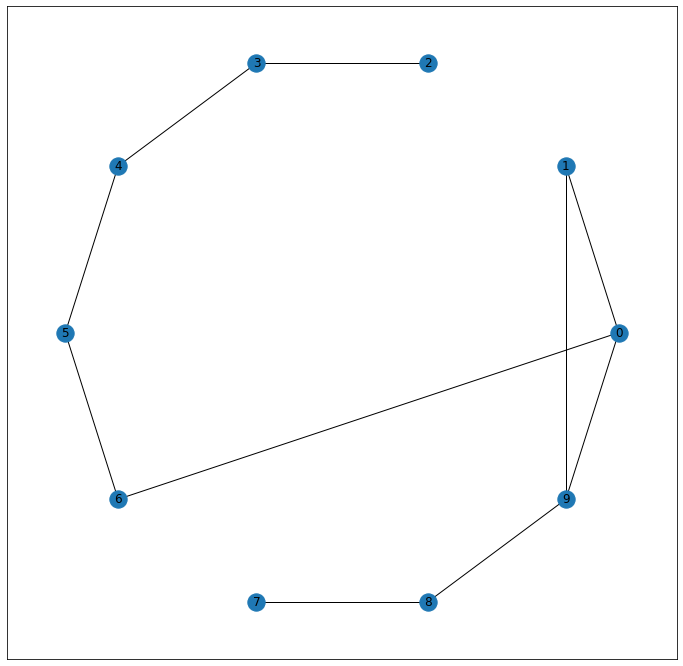

In [20]:
G = nx.watts_strogatz_graph(10, 3, 0.15)
pos = nx.circular_layout(G)
plt.figure(figsize = (12, 12))
nx.draw_networkx(G, pos)

In [7]:
def icm(g, p, new_active):
    activated = set()
    for node in new_active:
      print("Node " + str(node) + " activating: ")
      to_activate = []
      to_activate += g.neighbors(node)
      
      rand = random.uniform(0, 1) #generates a floating point in [0, 1]
      for neighbor in to_activate :
        if rand <= p :
          activated.add(neighbor)

          # this activated neighbor node should activate its unactivated neighbors
          if neighbor not in new_active :
            new_active.append(neighbor)

          print(neighbor)
      print()
    return (activated)

In [21]:
icm(G, 0.5, [1,2,8,4])

Node 1 activating: 
0
9

Node 2 activating: 

Node 8 activating: 

Node 4 activating: 

Node 0 activating: 
1
9
6

Node 9 activating: 
8
0
1

Node 6 activating: 



{0, 1, 6, 8, 9}

In [24]:
def max_icm(g, p):
    # initialize the maximum activation set
    mas = set()
    
    # keep track of the activated nodes
    activated = set()
    
    while True:
        # find the node that would maximize the number of activated nodes if added to the MAS
        max_node = None
        max_activated = len(activated)
        
        for node in g.nodes():
            if node not in mas:
                activated_copy = activated.copy()
                to_activate = set(g.neighbors(node))
                
                # activate the neighbors of the node
                for neighbor in to_activate:
                    rand = random.uniform(0, 1)
                    if rand <= p:
                        activated_copy.add(neighbor)
                        
                # count the number of activated nodes
                num_activated = len(activated_copy)
                
                # update the maximum activation set
                if num_activated > max_activated:
                    max_node = node
                    max_activated = num_activated
        
        # stop the algorithm if adding a node to the MAS does not increase the number of activated nodes
        if max_node is None:
            break
        
        # add the node to the maximum activation set
        mas.add(max_node)
        
        # activate the neighbors of the node
        to_activate = set(g.neighbors(max_node))
        for neighbor in to_activate:
            rand = random.uniform(0, 1)
            if rand <= p:
                activated.add(neighbor)
    
    # return the maximum activation set
    return mas

In [25]:
icm(G, 0.5, max_icm(G, 0.5))

Node 0 activating: 
1
9
6

Node 1 activating: 
0
9

Node 2 activating: 
3

Node 3 activating: 
2
4

Node 4 activating: 

Node 5 activating: 
4
6

Node 6 activating: 
5
0

Node 9 activating: 



{0, 1, 2, 3, 4, 5, 6, 9}